<center>Assignment 5<center>
Using Logistic Regression and Adaline Stochastic Gradient Descent to Predict Grad School Admission <br>
By Graham Chickering
    

For this assignment I focused on creating and comparing a logistic regression model and an adaline stochastic gradient descent model on my dataset. The dataset I chose to work with was on predicting the likelihood of someone getting admitted to grad school, based on factors such as GRE Score, Univerisity Rating,LOR, etc. Since my target variable, AdmitPercentage, was not a binary classifier, I had to create a new variable, LikelihoodAdmit, that was a binary classifier. I arbitrarily said someone had a high chance of grad school if their LikelihoodAdmit was greater than 0.75. I then used this column as my target variable to make predictions. The two factors I decied to use to make predictions are GRE Score and TOEFL Score. I end up comparing accuracy scores on the testing sets of the two models to see which one performs better on the dataset.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
admission=pd.read_csv("Admission_Predict.csv").astype("float")
admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,AdmitPercentage
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [3]:
qualityList=admission["AdmitPercentage"].unique().tolist()
qualityList.sort()
new=qualityList
print(new)

[0.34, 0.36, 0.37, 0.38, 0.39, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97]


In [4]:
admission.loc[admission["AdmitPercentage"]<=0.75, "LikelihoodAdmit"] = 0
admission.loc[admission["AdmitPercentage"]>0.75, "LikelihoodAdmit"] = 1
admission2=admission[["GRE Score", "TOEFL Score","LikelihoodAdmit"]]
admissions2=admission2.to_numpy()

In [5]:
X=admissions2[:, :2]
y=admissions2[:, 2]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [7]:
sc = StandardScaler()
sc.fit(X_train) ## Note that we standard only on the basis of the training set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=[], #c='', ## CHANGED TO AVOID A WARNING
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Logistic Regression Analysis using scikit-learn

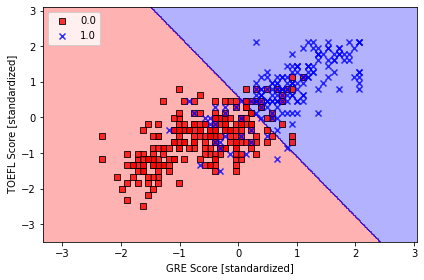

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10, random_state=1, solver='lbfgs')
lr.fit(X_train_std, y_train)

plot_decision_regions(X=X_train_std, 
                      y=y_train,
                      classifier=lr)

plt.xlabel('GRE Score [standardized]')
plt.ylabel(' TOEFL Score [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

Adaline Stochastic Gradient Descent


In [10]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        #print(self.w_)
        #print("xi:", xi, "target:", target, "output:", output, "error:", error)
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [11]:
admission.loc[admission["AdmitPercentage"]<=0.75, "LikelihoodAdmit"] = -1
admission.loc[admission["AdmitPercentage"]>0.75, "LikelihoodAdmit"] = 1
admission2=admission[["GRE Score", "TOEFL Score","LikelihoodAdmit"]]
admissions2=admission2.to_numpy()

In [12]:
X_ad=admissions2[:, :2]
y_ad=admissions2[:, 2]
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(
    X_ad, y_ad, test_size=0.2, random_state=1, stratify=y_ad)

sc = StandardScaler()
sc.fit(X_train_ad) ## Note that we standard only on the basis of the training set
X_train_std_ad = sc.transform(X_train_ad)
X_test_std_ad = sc.transform(X_test_ad)

X_combined_std_ad = np.vstack((X_train_std_ad, X_test_std_ad))
y_combined_ad = np.hstack((y_train_ad, y_test_ad))


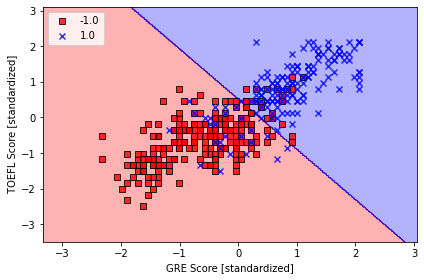

In [13]:
ada_sgd = AdalineSGD(n_iter=5000, eta=0.0001, random_state=1)
ada=ada_sgd.fit(X_train_std_ad, y_train_ad)

plot_decision_regions(X=X_train_std_ad, 
                      y=y_train_ad,
                      classifier=ada)

plt.xlabel('GRE Score [standardized]')
plt.ylabel(' TOEFL Score [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

Comparing Models Using Accuracy Score on Test Set

In [14]:
from sklearn.metrics import accuracy_score
y_pred_lr=lr.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score (y_test, y_pred_lr))

Accuracy: 0.880


In [15]:
y_pred_ad=ada.predict(X_test_std_ad)
print('Accuracy: %.3f' % accuracy_score (y_test_ad, y_pred_ad))

Accuracy: 0.870


After creating the logistic regression model and the adaline stochastic gradient descent model on the same training data, I then computed the accuracy score of the models on the testing tests using the respective models. The accuracy score is just how what percentage of the training set, the model correctly predicted. As we can see above the logistic regrerssion model had an accuracy score of 88% and the adaline model had an accuracy score of 87%. While we can see that the logistic regression model did slightly better in this example, that overall these models have almost the exact same accuracy score. In future models, it would be interesting to add more than two feature variables and to see how adding more variable would influence the model.